<a href="https://colab.research.google.com/github/TosinGeorge/Data-Science-Projects/blob/main/Income_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![picture](https://drive.google.com/uc?export=view&id=1G_xTTYs91sOfXcmnCnEI92Q3dxSS9iTR)

### **Use Case**

The use case for this project was the `Adult Income Dataset` sourced from the [Open ML](https://www.openml.org/search?type=data&status=active&id=43898&sort=runs) directory. The dataset was originally extracted from the 1994 US Census database.

### **Objectives**

The objective is to determine whether a US citizen will make over `US$50,000.00` a year or not.
I will fit 4 classification models and find the best model to describe classify the data. The models are:

* Random Forest
* Logistic Regression
* Support Vector Machine
* Decision Tree

### **Data Cleaning**

* Dataset description


Our dataset has 48,842 rows and 15 columns. Each entry contains the following information

• **age**: The age of the individual.

• **workclass**: Employment status of an individual

• **fnlwgt**: Final weight of the record. Number of
people represented by this row.

• **education-num**:(numerical) The education level.

• **education**:(categorical) The education level. 

• **marital-status**: Marital status of a person.

• **occupation**: Category of the occupation.

• **relationship**: Relationship in terms of the family. 

• **race**: Race of the person.

• **gender**:  gender at-birth.

• **capital-gain**: Dollar gain of capital.

• **capital-loss**: Dollar loss of capital.

• **hours-per-week**: Working hours per week.

• **native-country**: Country at birth.

• **income**: Income above or below 50,000



* Loading the dataset.

Our dataset was obtained in `.arff` file format. We then converted the `.arff `file to a dataframe in `pandas`.

In [38]:
#Import the necessary libraries and load the dataset provided
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from scipy.io import arff
arrdata = arff.loadarff('phpMawTba.arff')
data = pd.DataFrame(arrdata[0])
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25.0,b'Private',226802.0,b'11th',7.0,b'Never-married',b'Machine-op-inspct',b'Own-child',b'Black',b'Male',0.0,0.0,40.0,b'United-States',b'<=50K'
1,38.0,b'Private',89814.0,b'HS-grad',9.0,b'Married-civ-spouse',b'Farming-fishing',b'Husband',b'White',b'Male',0.0,0.0,50.0,b'United-States',b'<=50K'
2,28.0,b'Local-gov',336951.0,b'Assoc-acdm',12.0,b'Married-civ-spouse',b'Protective-serv',b'Husband',b'White',b'Male',0.0,0.0,40.0,b'United-States',b'>50K'
3,44.0,b'Private',160323.0,b'Some-college',10.0,b'Married-civ-spouse',b'Machine-op-inspct',b'Husband',b'Black',b'Male',7688.0,0.0,40.0,b'United-States',b'>50K'
4,18.0,b'?',103497.0,b'Some-college',10.0,b'Never-married',b'?',b'Own-child',b'White',b'Female',0.0,0.0,30.0,b'United-States',b'<=50K'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,b'Private',257302.0,b'Assoc-acdm',12.0,b'Married-civ-spouse',b'Tech-support',b'Wife',b'White',b'Female',0.0,0.0,38.0,b'United-States',b'<=50K'
48838,40.0,b'Private',154374.0,b'HS-grad',9.0,b'Married-civ-spouse',b'Machine-op-inspct',b'Husband',b'White',b'Male',0.0,0.0,40.0,b'United-States',b'>50K'
48839,58.0,b'Private',151910.0,b'HS-grad',9.0,b'Widowed',b'Adm-clerical',b'Unmarried',b'White',b'Female',0.0,0.0,40.0,b'United-States',b'<=50K'
48840,22.0,b'Private',201490.0,b'HS-grad',9.0,b'Never-married',b'Adm-clerical',b'Own-child',b'White',b'Male',0.0,0.0,20.0,b'United-States',b'<=50K'


* I discovered some inconsistencies in the object columns, including some missing values in the dataset. I will be deleting the inconsistencies and missing values

In [39]:
#To remove the inconsistencies such as 'b' 

o_cols = [i for i in data.columns if data[i].dtype=="O"] #extract the object columns
data[o_cols] =data[o_cols].apply(lambda x: x.str.decode('utf8'))
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25.0,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28.0,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18.0,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
48838,40.0,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
48839,58.0,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
48840,22.0,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


* After deleting the inconsistencies, I also discovered that some of the rows contained special characters such as '?'. I will identify the rows with special characters '?' and delete them.

In [40]:
#identifying the columns with special characters (?)

for i in data.columns:
  if data[i].dtype=="O":
    print (data[i].value_counts())

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         561

In [41]:
#identify the number of special characters ('?') across the dataset
data.isin(['?']).sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64

In [42]:
#identifying and deleting duplicates rows
data.drop_duplicates(keep = 'first' )

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25.0,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28.0,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18.0,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
48838,40.0,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
48839,58.0,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
48840,22.0,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


In [43]:
#replacing special character('?') with NaN, then dropping the rows
data.workclass = data.workclass.replace('?', np.nan)
data.occupation = data.occupation.replace('?', np.nan)
data['native-country'] = data['native-country'].replace('?', np.nan)

data = data.dropna()
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25.0,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28.0,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
5,34.0,Private,198693.0,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
48838,40.0,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
48839,58.0,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
48840,22.0,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


* Rename the columns

In [44]:
#renaming the columns by replacing the hypehn with an underscore
data = data.rename(columns = {'marital-status':'marital_status',
                              'capital-gain':'capital_gain',
                              'capital-loss':'capital_loss', 
                              'hours-per-week':'hours_per_week',
                              'native-country':'country'})

* **Dataset Statistics**

In [45]:
data.describe()

,age,fnlwgt,education-num,capital_gain,capital_loss,hours_per_week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


The minimum and maximum age of people in the dataset is 17 and 90 years respectively, while the average age is 39 years.*
*While the minimum and average capital gain is 0, maximum is 4356.* 
*The number of hours spent per week varies between 1 to 99 and the average being 41 hours.

###**Data Visualization & Exploration**

Exploring and visualizing different columns in the dataset


In [46]:
#importing the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
#making a copy of the data
viz_data = data.copy(deep=True)

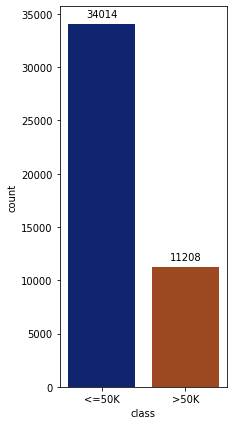

In [48]:
categorical_columns = viz_data.select_dtypes(include = ['object'])

#1. Class Column Countplot
plt.figure(figsize =(3,7))
bar = sns.countplot(data = categorical_columns, x = 'class',palette='dark')

for p in bar.patches:
  bar.annotate(format(p.get_height(), '.0f'), 
             (p.get_x() + p.get_width() / 2., 
              p.get_height()), ha = 'center', 
             va = 'center', xytext = (0, 10), 
             textcoords = 'offset points');

**Observation**: *The number of people earning less than 50K dollars/year is three times more than the people earning over 50k dollars.*


In [49]:
#creating categories for the age column
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

viz_data['age_group'] = viz_data['age'].apply(age_group)


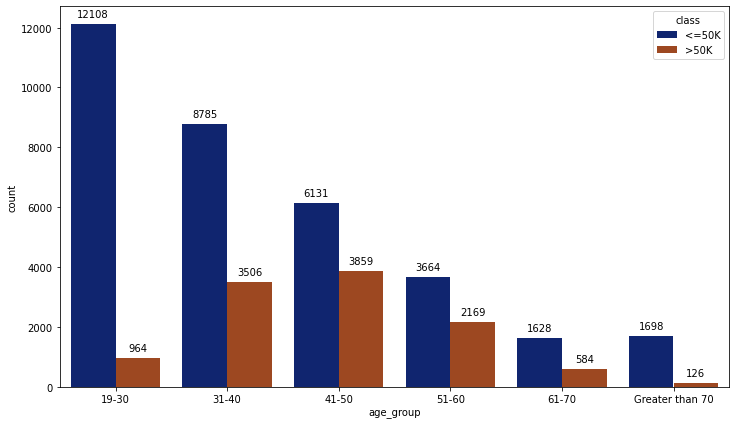

In [50]:
plt.figure(figsize=(12,7))
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
bar = sns.countplot(viz_data['age_group'], hue = viz_data['class'], palette='dark', order = order_list)

for p in bar.patches:
  bar.annotate(format(p.get_height(), '.0f'), 
             (p.get_x() + p.get_width() / 2., 
              p.get_height()), ha = 'center', 
             va = 'center', xytext = (0, 10), 
             textcoords = 'offset points');

**Observation**: *The number of people earning more than 50K is low for the 19 - 30 age group and quite negligible amongst people of age group 70 and above.*
*There are more people earning over 50k/year in the  41-50 and 51-60 age groups.* 

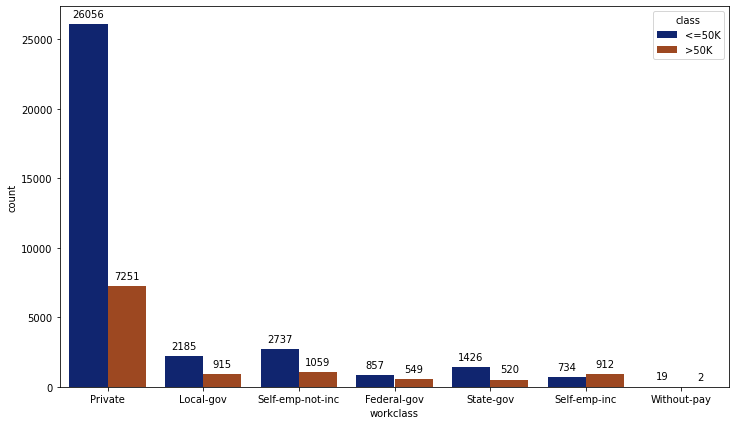

In [51]:
#Workclass Column Countplot

plt.figure(figsize =(12,7))
bar = sns.countplot(viz_data['workclass'], hue = viz_data['class'],palette='dark')

for p in bar.patches:
  bar.annotate(format(p.get_height(), '.0f'), 
             (p.get_x() + p.get_width() / 2., 
              p.get_height()), ha = 'center', 
             va = 'center', xytext = (0, 10), 
             textcoords = 'offset points');

**Observation**: *Only 21% of US Citizens in the Private industry earn above 50k/annum. People who are self-employed are likely to earn more than 50K dollars/annum!* 

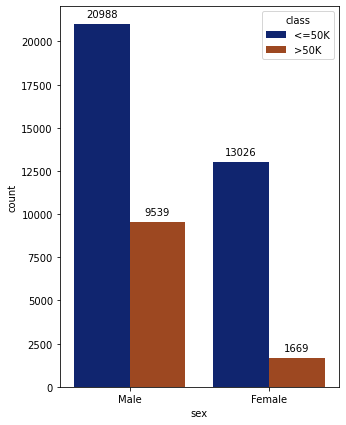

In [52]:
#Sex Column Countplot

plt.figure(figsize =(5,7))
bar = sns.countplot(viz_data['sex'], hue = viz_data['class'],palette='dark')

for p in bar.patches:
  bar.annotate(format(p.get_height(), '.0f'), 
             (p.get_x() + p.get_width() / 2., 
              p.get_height()), ha = 'center', 
             va = 'center', xytext = (0, 10), 
             textcoords = 'offset points');

**Observation**: *About 11% of female adults earn more than 50K dollars/year. 31% of male adults earn more than 50K dollars an year.*

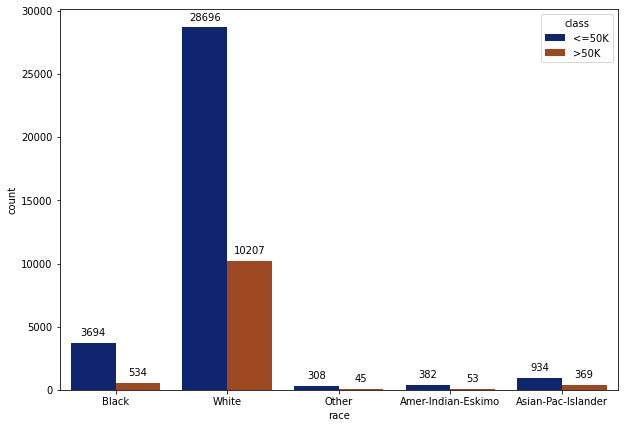

In [53]:
#Race Column Countplot

plt.figure(figsize =(10,7))
bar = sns.countplot(viz_data['race'], hue = viz_data['class'],palette='dark')

for p in bar.patches:
  bar.annotate(format(p.get_height(), '.0f'), 
             (p.get_x() + p.get_width() / 2., 
              p.get_height()), ha = 'center', 
             va = 'center', xytext = (0, 10), 
             textcoords = 'offset points');

**Observation**: *Irrespective of race, The percentage of those who earn over 50k/annum is considerably less than those who earn below 50k/annum.* 

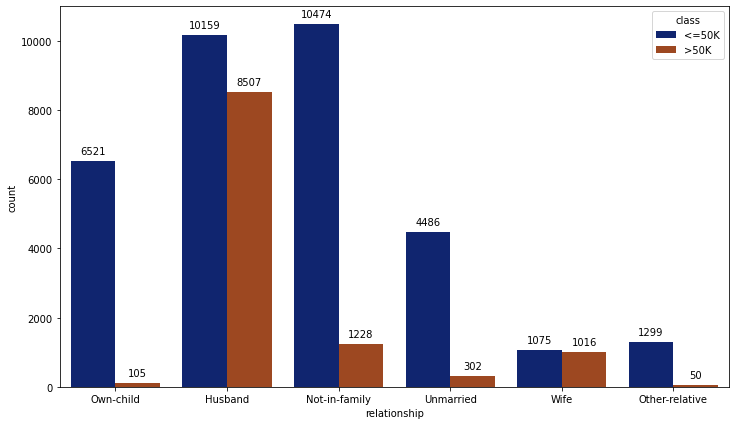

In [54]:
#Relationship Column Countplot

plt.figure(figsize =(12,7))
bar = sns.countplot(viz_data['relationship'], hue = viz_data['class'],palette='dark')

for p in bar.patches:
  bar.annotate(format(p.get_height(), '.0f'), 
             (p.get_x() + p.get_width() / 2., 
              p.get_height()), ha = 'center', 
             va = 'center', xytext = (0, 10), 
             textcoords = 'offset points');

**Observation**: *Husbands and wives are more likely to earn more than 50K dollars an year. Other categories in this column display a low percentage of citizens earning more than 50k.*


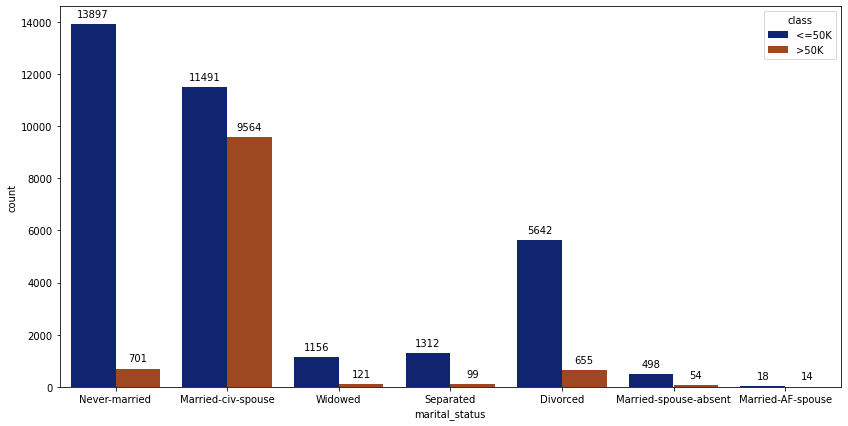

In [55]:
#Marital Status Column Countplot

plt.figure(figsize =(14,7))
bar = sns.countplot(viz_data['marital_status'], hue = viz_data['class'],palette='dark')

for p in bar.patches:
  bar.annotate(format(p.get_height(), '.0f'), 
             (p.get_x() + p.get_width() / 2., 
              p.get_height()), ha = 'center', 
             va = 'center', xytext = (0, 10), 
             textcoords = 'offset points');

**Observation**: *Married citizens who are civilians have a higher chance of earning more 50k per annum.*


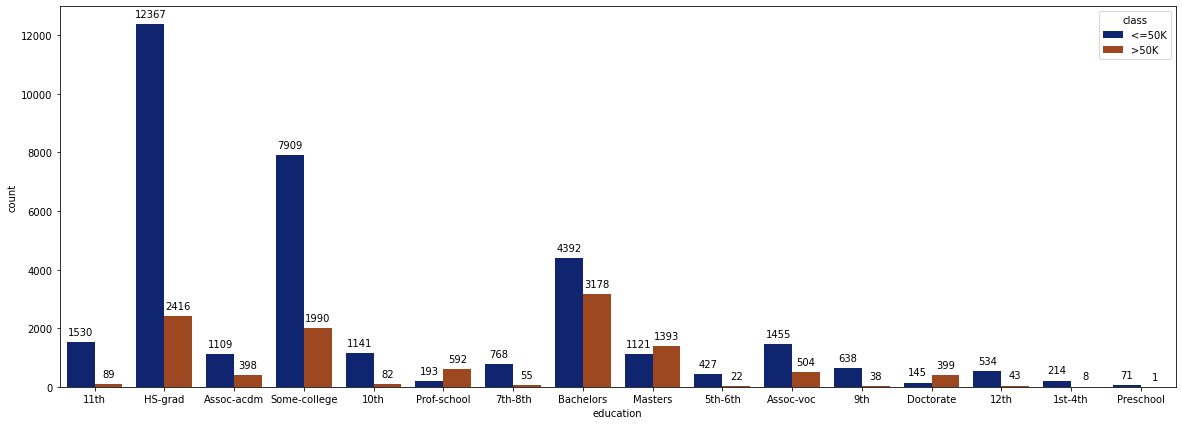

In [56]:
#Education Column Countplot

plt.figure(figsize =(20,7))
bar = sns.countplot(viz_data['education'], hue = viz_data['class'],palette='dark')

for p in bar.patches:
  bar.annotate(format(p.get_height(), '.0f'), 
             (p.get_x() + p.get_width() / 2., 
              p.get_height()), ha = 'center', 
             va = 'center', xytext = (0, 10), 
             textcoords = 'offset points');

**Observation**:  *The more education you have,the higher the chances of earning over 50K*


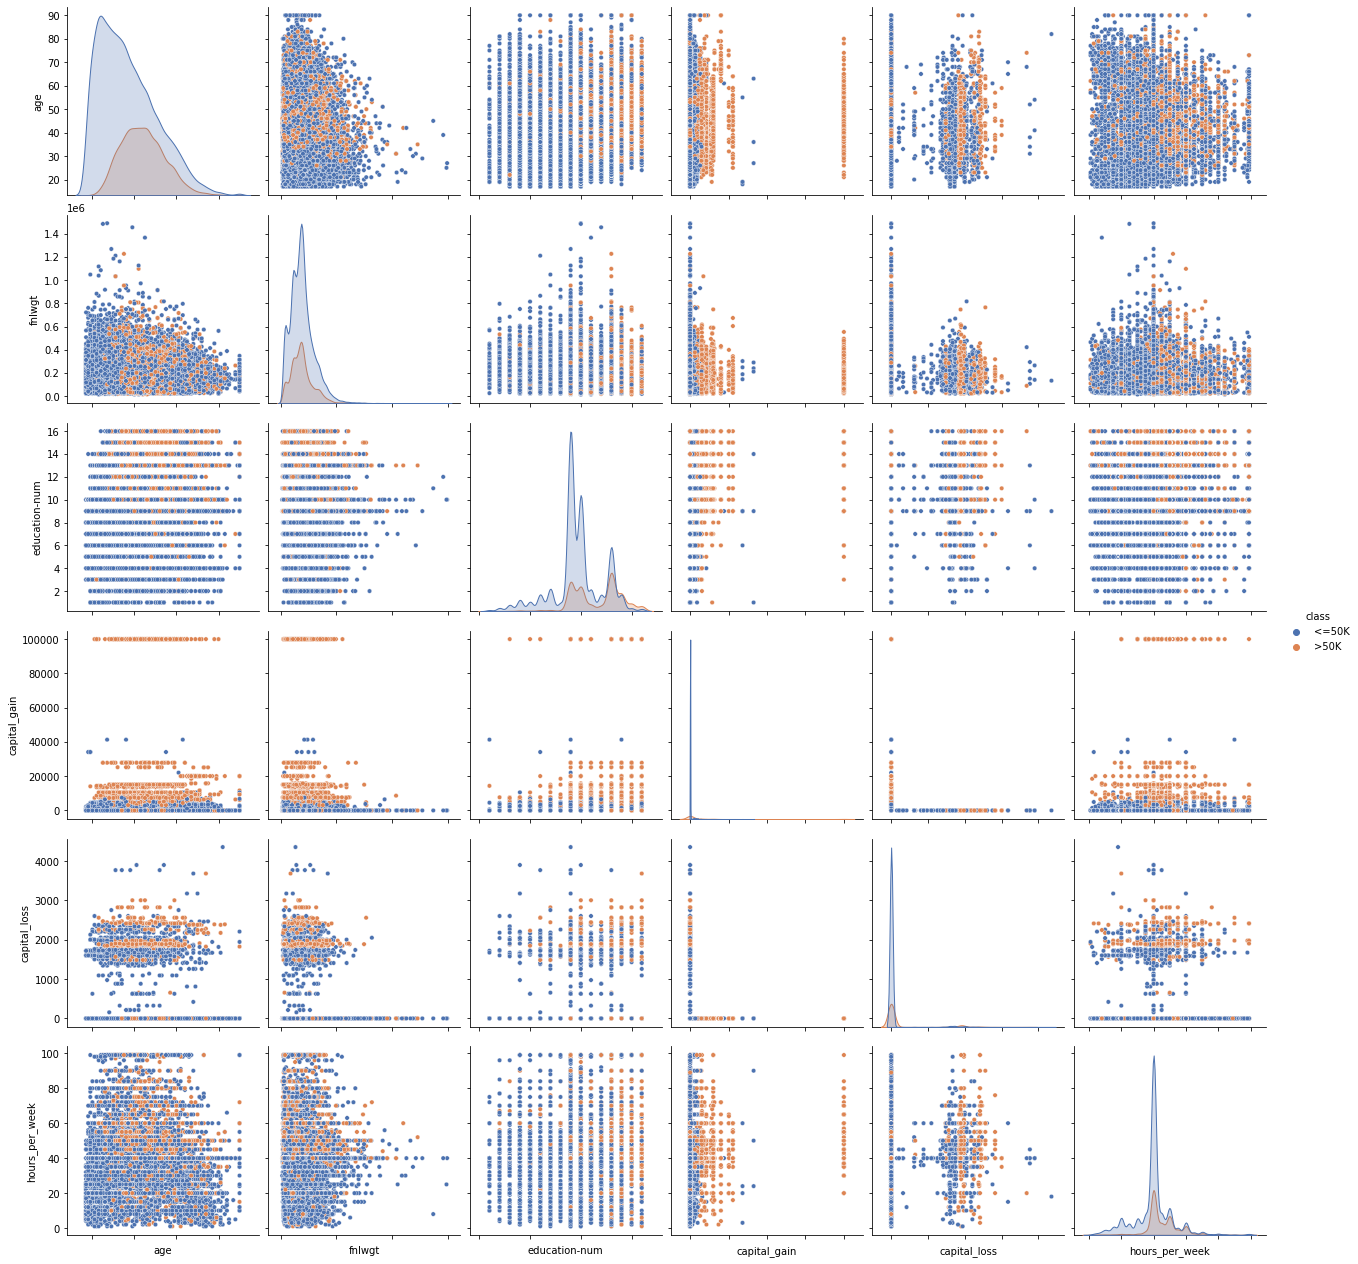

In [57]:
#using a pairplot to visualize the numerical columns in the dataset
pp = sns.pairplot(viz_data, hue = 'class', palette = 'deep', 
                  size=3, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=20) )
pp.set(xticklabels=[]);

### **Data Modeling**

First, we encode all the categorical features (both the target feature and the descriptive features) into a set of numerical features.

In [58]:
#import the necessary libraries
from sklearn.preprocessing import LabelEncoder

In [59]:
labels = LabelEncoder()

In [60]:
#transforming the categorical features
data.workclass = labels.fit_transform(data.workclass)
data.education = labels.fit_transform(data.education)
data.marital_status = labels.fit_transform(data.marital_status)
data.occupation = labels.fit_transform(data.occupation)
data.relationship	 = labels.fit_transform(data.relationship	)
data.race = labels.fit_transform(data.race)
data.sex = labels.fit_transform(data.sex)
data.country = labels.fit_transform(data.country)
data['class'] = labels.fit_transform(data['class'])

data

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,class
0,25.0,2,226802.0,1,7.0,4,6,3,2,1,0.0,0.0,40.0,38,0
1,38.0,2,89814.0,11,9.0,2,4,0,4,1,0.0,0.0,50.0,38,0
2,28.0,1,336951.0,7,12.0,2,10,0,4,1,0.0,0.0,40.0,38,1
3,44.0,2,160323.0,15,10.0,2,6,0,2,1,7688.0,0.0,40.0,38,1
5,34.0,2,198693.0,0,6.0,4,7,1,4,1,0.0,0.0,30.0,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,2,257302.0,7,12.0,2,12,5,4,0,0.0,0.0,38.0,38,0
48838,40.0,2,154374.0,11,9.0,2,6,0,4,1,0.0,0.0,40.0,38,1
48839,58.0,2,151910.0,11,9.0,6,0,4,4,0,0.0,0.0,40.0,38,0
48840,22.0,2,201490.0,11,9.0,4,0,3,4,1,0.0,0.0,20.0,38,0


`>50k` has been labelled as 1, while `=<50k` has been labelled as 0*

* Exploring the correlation between features and target variable

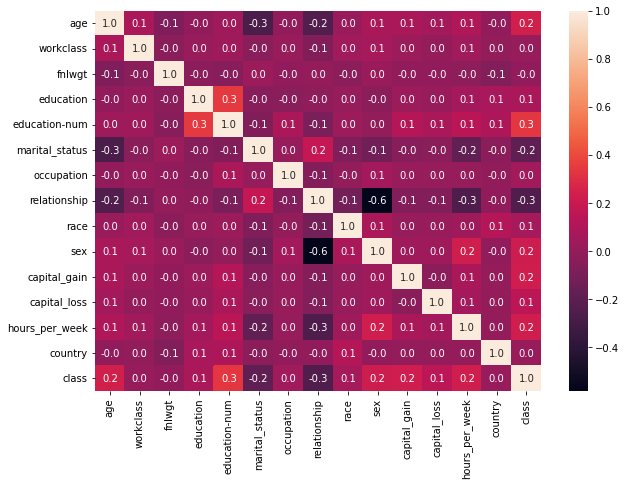

In [61]:
#heatmap
plt.figure(figsize =(10,7))
sns.heatmap(data.corr(), annot=True, fmt ='.1f');

**Observation**: *No colinearity exists between the features. The correlation between the features and the target variable is quite low.* 




* Identify the features and target variable

In [62]:
#features and target variable
x = data.drop(['class'], axis=1) #feature variable
y= data['class'] #target variable

* Dataset Training and Splitting 

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state = 42)

* Data Scaling

In [64]:
scaled_col = x_train.columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [65]:
x_train = pd.DataFrame(x_train, columns=[scaled_col])
x_test = pd.DataFrame(x_test, columns=[scaled_col])

* Feature Selection Ranked by Degree of Importance

Since I observed weak correlation between features and the target variables. I will employ the Random Forest  Feature Importance (RFI) which ranks features by relevance to the dataset. I also used the  Synthetic Minority Oversampling Technique (SMOTE) to address the imbalance in our dataset.

In [66]:
#import the necessary libraries

import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

#testing the model with 10 estimators
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

print('Model accuracy score with 10 estimators : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 estimators : 0.8557


In [67]:
#increasing the number of estimators to 200 to improve accuracy score

r_class = RandomForestClassifier(random_state=42,n_estimators=200)
r_class.fit(x_train, y_train)
y_pred = r_class.predict(x_test)

print('Model accuracy score with 200 estimators : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 200 estimators : 0.8572


In [68]:
#importing SMOTE
smt = SMOTE(random_state=42)

In [69]:
#applying the SMOTE technique to address imbalance in the dataset

x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)
x_test_sm, y_test_sm = smt.fit_resample(x_test, y_test)

a_class = RandomForestClassifier(random_state=0,n_estimators=200)

a_class.fit(x_train_sm, y_train_sm)
y_pred = a_class.predict(x_test_sm)
y_pred

print('Model accuracy score using SMOTE : {0:0.4f}'. format(accuracy_score(y_pred,y_test_sm)))

Model accuracy score using SMOTE : 0.8650


Comparing the accuracy score of the Random Forest Classifier after using the SMOTE technique. We observe that the SMOTE Technique provides a higher accuracy score. We will also be applying the technique across our models.

* Ranking features by importance

In [70]:
feature_scores = pd.Series(r_class.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores

fnlwgt            0.178500
age               0.148867
capital_gain      0.114963
relationship      0.104967
education-num     0.087033
hours_per_week    0.082577
marital_status    0.068452
occupation        0.065498
workclass         0.037945
capital_loss      0.036031
education         0.031747
country           0.015549
sex               0.014334
race              0.013533
dtype: float64

**Observation**: *`Final weight` is observed to be the most relevant feature in our dataset, closely followed by `age`, `capital_gain` and `relationship`.*

*On further exploration, I fitted the Random Forest Classifier model with 3,4,5,6 and 7 most important features, however I observed that accuracy score was slightly lower compared the accuracy score of fitting all 14 features*


* Model Exploration 

In [71]:
#import the necessary libraries and models

from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import confusion_matrix

**Logistic Regression**


In [72]:
x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)
x_test_sm, y_test_sm = smt.fit_resample(x_test, y_test)

l_class = LogisticRegression()

l_class.fit(x_train_sm, y_train_sm)
ls_pred = l_class.predict(x_test_sm)
ls_pred

print('Model accuracy score : {0:0.4f}'. format(accuracy_score(ls_pred,y_test_sm)))

Model accuracy score : 0.7640


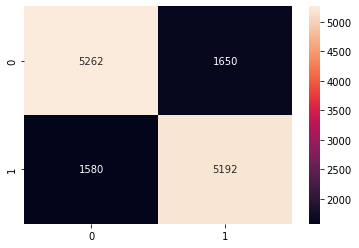

In [73]:
cs = confusion_matrix(ls_pred,y_test_sm)
sns.heatmap(cs, annot=True, fmt= '.0f');

**Support Vector Model**

In [74]:
x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)
x_test_sm, y_test_sm = smt.fit_resample(x_test, y_test)

s_class = SVC()

s_class.fit(x_train_sm, y_train_sm)
ss_pred = s_class.predict(x_test_sm)
ss_pred

print('Model accuracy score : {0:0.4f}'. format(accuracy_score(ss_pred,y_test_sm)))

Model accuracy score : 0.8271


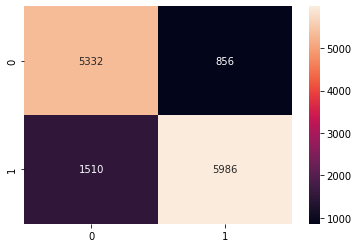

In [77]:
cs = confusion_matrix(ss_pred,y_test_sm)
sns.heatmap(cs, annot=True, fmt= '.0f');

**Decision Tree**

In [78]:
x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)
x_test_sm, y_test_sm = smt.fit_resample(x_test, y_test)

t_class = tree.DecisionTreeClassifier()

t_class.fit(x_train_sm, y_train_sm)
ts_pred = t_class.predict(x_test_sm)
ts_pred

print('Model accuracy score : {0:0.4f}'. format(accuracy_score(ts_pred,y_test_sm)))

Model accuracy score : 0.8211


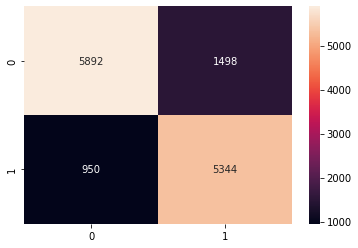

In [79]:
cs = confusion_matrix(ts_pred,y_test_sm)
sns.heatmap(cs, annot=True, fmt= '.0f');

**Comparing Accuracy Score across Different Models**


In [80]:
accuracy = {
    'Model': ['Random Forest','Logistic Regression','Support Vector Machine','Decison Tree'],
    'Accuracy': ['86.50%','76.4%','82.70%','82.11%']

}
acc_data = pd.DataFrame(accuracy)
acc_data = acc_data.reset_index(drop=True)
acc_data

,Model,Accuracy
0,Random Forest,86.50%
1,Logistic Regression,76.4%
2,Support Vector Machine,82.70%
3,Decison Tree,82.11%


The Random Forest model performed the best with an accuracy score of 86.5%, followed by Support Vector Machine (82.7%), Decision Tree (82.11%) and Logistic Regression(76.4%).
